In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('AB_NYC_2019.csv')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<AxesSubplot:xlabel='price', ylabel='Count'>

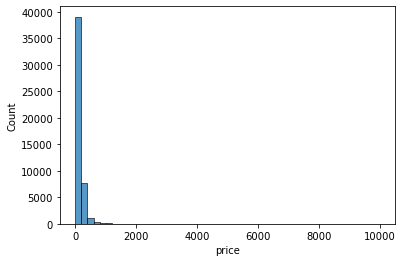

In [15]:
sns.histplot(df.price, bins= 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

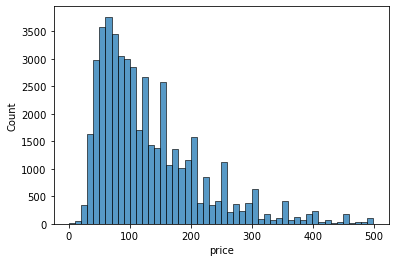

In [16]:
sns.histplot(df.price[df.price < 500], bins = 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

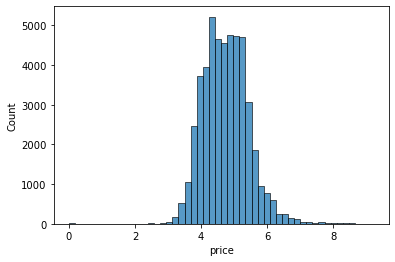

In [17]:
log_price = np.log1p(df.price)
sns.histplot(log_price, bins= 50)

In [18]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [32]:
select_col = ['latitude', 'longitude','price',
       'minimum_nights', 'number_of_reviews','reviews_per_month',
              'calculated_host_listings_count',
       'availability_365' ]

In [24]:
#Q1
sel_df = df[select_col]
sel_df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
#Q2
sel_df.minimum_nights.median()

3.0

In [199]:
#Q2
n = len(sel_df)

n_train = int(n * 0.6)

n_val = int(n * 0.2)

n_test = n - n_val - n_train

idx = np.arange(n)

np.random.seed(42)

np.random.shuffle(idx)

df_train = sel_df.iloc[idx[:n_train]]
df_val = sel_df.iloc[idx[n_train:n_train+n_val]]
df_test = sel_df.iloc[idx[n_train + n_val : ]]



In [200]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [201]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [202]:
del df_train['price']
del df_val['price']
del df_test['price']

# Filling na's with 0's

In [203]:
#Q3

def train_linear_regression(X, y):
    X = np.array(X)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]




In [204]:
X_train = df_train.fillna(0).values

w0 , w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)


In [71]:
w0

-419.9126586345957

In [72]:
w

array([ 1.30676225e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
       -8.25470066e-03,  1.33371320e-03,  6.50203890e-04])

<AxesSubplot:ylabel='Count'>

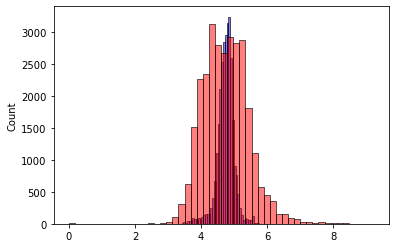

In [75]:
sns.histplot(y_pred, color = 'blue', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'red', alpha = 0.5, bins = 50)

In [81]:
def rmse(y, y_pred):
    sq_err = (y - y_pred)**2
    mean_sq_err = sq_err.mean()
    return np.sqrt(mean_sq_err)

In [219]:
def prepare_X(df):
    X = df.fillna(0).values
    return X

In [198]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
RMSE_0 = rmse(y_val, y_pred)

In [92]:
RMSE_0.round(2)

0.64

# Filling with mean value

In [191]:
#Q3

X_train = df_train.fillna(df_train.reviews_per_month.mean()).values

w0 , w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)


In [106]:
w0

-423.53930819565585

In [107]:
w

array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849280e-04,
        5.34563274e-03,  1.32706019e-03,  6.38794182e-04])

<AxesSubplot:ylabel='Count'>

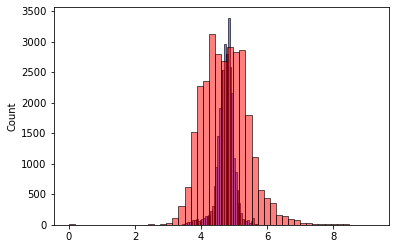

In [108]:
sns.histplot(y_pred, color = 'blue', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'red', alpha = 0.5, bins = 50)

In [218]:
def prepare_X_withmean(df):
    X = df.fillna(df_train.mean()).values
    return X

In [128]:
X_val = prepare_X_withmean(df_val)
y_pred = w0 + X_val.dot(w)
RMSE_mean = rmse(y_val, y_pred)

In [129]:
RMSE_mean.round(2)

0.64

In [130]:
round(RMSE_0, 2), round(RMSE_mean, 2)

(0.64, 0.64)

# Regularized

In [245]:
#4
def train_lin_regression_regu(X, y, r = 0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [246]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w =  train_lin_regression_regu(X_train, y_train, r =r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = (rmse(y_val, y_pred)).round(2)
    
    print(r, w0, score)

0 -426.82097033676945 0.65
1e-06 -426.76977363060024 0.65
0.0001 -421.76140767251485 0.65
0.001 -381.1028390156473 0.65
0.01 -194.04202812140392 0.66
0.1 -32.840574132516444 0.68
1 -3.5271114747238133 0.69
5 -0.708997201157423 0.69
10 -0.3541269038576437 0.69


# Q5 

In [247]:
RMSEs =[]
for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(r)

    np.random.shuffle(idx)

    df_train = sel_df.iloc[idx[:n_train]]
    df_val = sel_df.iloc[idx[n_train:n_train+n_val]]
    df_test = sel_df.iloc[idx[n_train + n_val : ]]
    
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    def train_linear_regression(X, y):
        X = np.array(X)
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])
    
        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)
    
        return w_full[0], w_full[1:]

    X_train = df_train.fillna(0).values

    w0 , w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)
    
    def rmse(y, y_pred):
        sq_err = (y - y_pred)**2
        mean_sq_err = sq_err.mean()
        return np.sqrt(mean_sq_err)
    
    def prepare_X(df):
        X = df.fillna(0).values
        return X
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    RMSE_0 = rmse(y_val, y_pred)
    print(r, RMSE_0)
    
    RMSEs.append(RMSE_0)       

0 0.6418774754386639
1 0.6470131645358878
2 0.6464370094266825
3 0.6341620345564064
4 0.6356615268624544
5 0.6459255268058772
6 0.6519132741033282
7 0.6422434466751654
8 0.644730213842907
9 0.6412505989249974


In [157]:
print(RMSEs)

[0.6437978266346391, 0.6477324277731559, 0.6448311656039049, 0.6423033257713193, 0.6386966774167303, 0.6477774952527805, 0.6532399768204254, 0.6479438247557815, 0.6417008025315449, 0.6483345126051223]


In [163]:
stndev = np.std(RMSEs)
print(stndev/n)
print(stndev.round(2))

8.134207103292954e-08
0.0


In [ ]:
#Q6 

In [248]:
np.random.seed(9)

np.random.shuffle(idx)

df_train = sel_df.iloc[idx[:n_train]]
df_val = sel_df.iloc[idx[n_train:n_train+n_val]]
df_test = sel_df.iloc[idx[n_train + n_val : ]]
    
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
    
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
    
    
df_full_train = pd.concat([df_train, df_val])
    
    
y_full_train = np.concatenate([y_train, y_val])
       
del df_train['price']
del df_val['price']
del df_test['price']
            
def train_lin_regression_regu(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    sq_err = (y - y_pred)**2
    mean_sq_err = sq_err.mean()
    return np.sqrt(mean_sq_err)

def prepare_X(df):
    X = df.fillna(0).values
    return X

r =0.001
X_full_train = prepare_X(df_full_train)
w0, w =  train_lin_regression_regu( X_full_train, y_full_train, r = r)
    
y_full_pred = w0 + X_full_train.dot(w)
score = (rmse(y_full_train, y_full_pred)).round(2)
    
print(score)

0.5


In [251]:
r =0.001
X_test = prepare_X(df_test)
w0, w =  train_lin_regression_regu( X_test, y_test, r = r)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score



0.6492329652364999